### An example showing the plot_calibration_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `calibration_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_calibration_curve` method.

In [1]:
!conda info -e && python -V


# conda environments:
#
                       /opt/conda
base                 * /opt/conda/envs/py311
                       /opt/conda/envs/py313

Python 3.11.11


In [2]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.5.dev0+git.20250623.4ca0c21'

In [3]:
sp.metrics.plot_calibration?

Signature:
sp.metrics.plot_calibration(
    y_true,
    y_probas_list,
    *,
    pos_label=None,
    class_index=None,
    class_names=None,
    to_plot_class_index=1,
    estimator_names=None,
    n_bins=10,
    strategy='uniform',
    title='Calibration Curves (Reliability Diagrams)',
    title_fontsize='large',
    text_fontsize='medium',
    cmap='inferno',
    **kwargs,
)
Docstring:
Plot calibration curves for a set of classifier probability estimates.

This function plots calibration curves, also known as reliability curves,
which are useful to assess the calibration of probabilistic models.
For a well-calibrated model, the predicted probability should match the
observed frequency of the positive class.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_probas_list : list of array-like, shape (n_samples, 2) or (n_samples,)
    A list containing the outputs of classifiers' `predict_proba` or
    `decision_function` method

In [4]:
# Load the data
X, y = make_classification(
	n_samples=100000,
	n_features=20,
	n_informative=4,
	n_redundant=2,
	n_repeated=0,
	n_classes=3,
	n_clusters_per_class=2,
	random_state=0,
)
X_train, y_train, X_val, y_val = X[:1000], y[:1000], X[1000:], y[1000:]

X_train.shape

(1000, 20)

In [5]:
# Create an instance of the LogisticRegression
lr_probas = (
	LogisticRegression(solver='liblinear', max_iter=int(1e5), random_state=0)
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_val)
svc_scores = LinearSVC().fit(X_train, y_train).decision_function(X_val)
svc_isotonic = (
	CalibratedClassifierCV(LinearSVC(), cv=2, method='isotonic')
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
svc_sigmoid = (
	CalibratedClassifierCV(LinearSVC(), cv=2, method='sigmoid')
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
rf_probas = (
	RandomForestClassifier(random_state=0)
    .fit(X_train, y_train)
    .predict_proba(X_val)
)

In [6]:
probas_dict = {
	LogisticRegression(): lr_probas,
	# GaussianNB(): nb_probas,
	'LinearSVC() + MinMax': svc_scores,
	'LinearSVC() + Isotonic': svc_isotonic,
	'LinearSVC() + Sigmoid': svc_sigmoid,
	# RandomForestClassifier(): rf_probas,
}

In [11]:
np.asanyarray(list(probas_dict.keys()), dtype=str)

array(['LogisticRegression()', 'LinearSVC() + MinMax',
       'LinearSVC() + Isotonic', 'LinearSVC() + Sigmoid'], dtype='<U22')

In [10]:
np.asanyarray(list(map(np.asanyarray, probas_dict.values())))

array([[[ 7.68027066e-01,  1.31533900e-01,  1.00439034e-01],
        [ 6.00712092e-01,  1.09018344e-02,  3.88386073e-01],
        [ 4.09854917e-01,  5.73406005e-04,  5.89571677e-01],
        ...,
        [ 1.17239687e-02,  6.20433078e-01,  3.67842954e-01],
        [ 4.62039054e-02,  6.77346250e-02,  8.86061470e-01],
        [ 6.23078596e-03,  6.52435206e-01,  3.41334008e-01]],

       [[ 3.38065800e-01, -7.00591128e-01, -8.45512156e-01],
        [ 3.21893346e-01, -1.54567754e+00, -1.15750682e-01],
        [ 2.25492588e-01, -2.49509036e+00,  6.92232154e-01],
        ...,
        [-1.46901990e+00,  1.60872621e-01, -2.21378058e-01],
        [-1.00072177e+00, -9.55931850e-01,  4.27704175e-01],
        [-1.65162242e+00,  3.42628918e-01, -2.00199564e-01]],

       [[ 7.51920880e-01,  1.86654607e-01,  6.14245128e-02],
        [ 5.58083110e-01,  0.00000000e+00,  4.41916890e-01],
        [ 3.44382747e-01,  0.00000000e+00,  6.55617253e-01],
        ...,
        [ 1.30286351e-02,  6.03996427e-01,

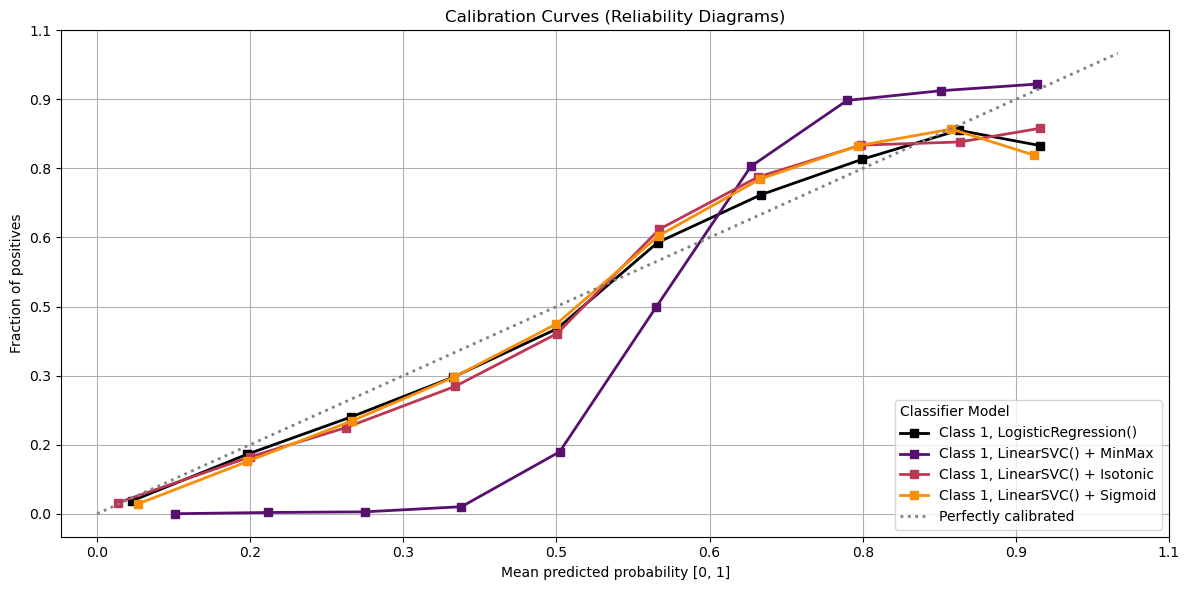

In [7]:
# Plot!
fig, ax = plt.subplots(figsize=(12, 6))
ax = sp.metrics.plot_calibration(
	y_val, y_probas_list=probas_dict.values(), estimator_names=probas_dict.keys(), ax=ax
);

In [8]:
# Load the data
X, y = make_classification(
	n_samples=100000,
	n_features=20,
	n_informative=4,
	n_redundant=2,
	n_repeated=0,
	n_classes=3,
	n_clusters_per_class=2,
	random_state=0,
)
X_train, y_train, X_val, y_val = X[:1000], y[:1000], X[1000:], y[1000:]

X_train.shape

(1000, 20)

In [9]:
# Create an instance of the LogisticRegression
lr_probas = (
	LogisticRegression(max_iter=int(1e5), random_state=0)
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_val)
svc_scores = LinearSVC().fit(X_train, y_train).decision_function(X_val)
svc_isotonic = (
	CalibratedClassifierCV(LinearSVC(), cv=2, method='isotonic')
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
svc_sigmoid = (
	CalibratedClassifierCV(LinearSVC(), cv=2, method='sigmoid')
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
rf_probas = (
	RandomForestClassifier(random_state=0)
    .fit(X_train, y_train)
    .predict_proba(X_val)
)

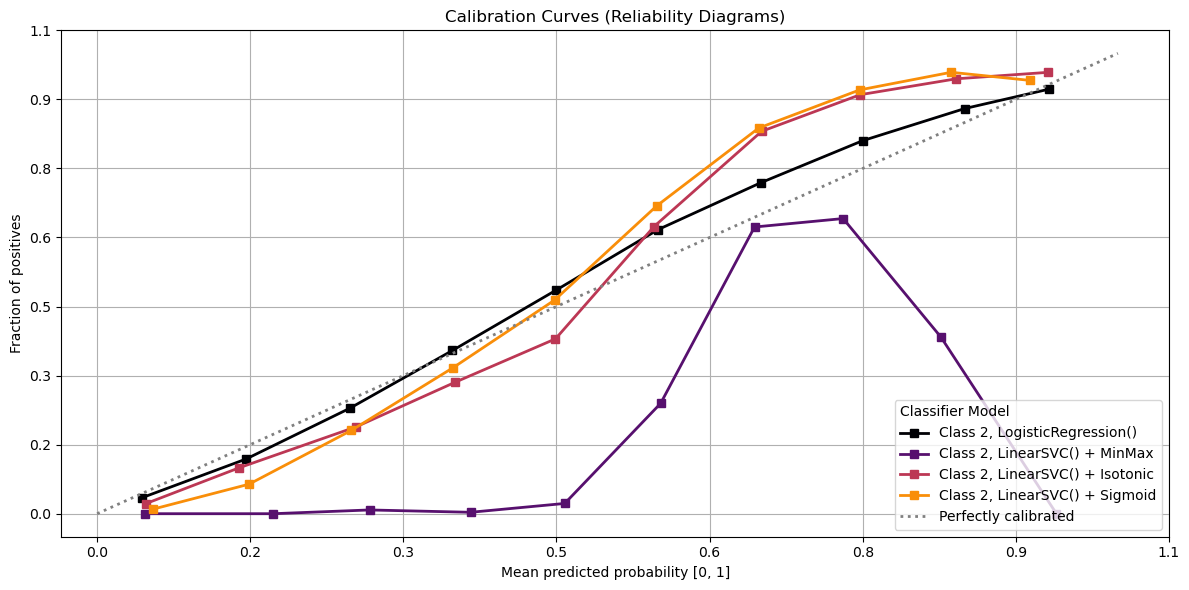

In [10]:
probas_dict = {
	LogisticRegression(): lr_probas,
	# GaussianNB(): nb_probas,
	'LinearSVC() + MinMax': svc_scores,
	'LinearSVC() + Isotonic': svc_isotonic,
	'LinearSVC() + Sigmoid': svc_sigmoid,
	# RandomForestClassifier(): rf_probas,
}
# Plot!
fig, ax = plt.subplots(figsize=(12, 6))
ax = sp.metrics.plot_calibration(
	y_val,
	y_probas_list=probas_dict.values(),
	estimator_names=probas_dict.keys(),
	to_plot_class_index=[2],
	ax=ax,
);